### Prévision d’une série temporelle par lissage exponentiel (Holt-Winters) en Python

## Introduction du jeu de données

Dans ce travail pratique, nous utilisons un jeu de données réel portant sur la concentration
du **dioxyde de carbone (CO₂) atmosphérique**, mesurée à l’observatoire de **Mauna Loa (Hawaï)**.

Ce jeu de données est fourni par la bibliothèque **statsmodels** et contient des mesures
**hebdomadaires** du CO₂ exprimées en parties par million (ppm), couvrant la période
allant de **1958 à 2001**, soit un total de **2284 observations**.

La concentration du CO₂ est une variable environnementale d’intérêt majeur, car elle est
directement liée aux phénomènes de changement climatique. La série présente à la fois
une **tendance croissante à long terme** et une **saisonnalité annuelle marquée**, causée
principalement par les cycles naturels de la végétation.

Ces caractéristiques font de ce jeu de données un excellent candidat pour l’analyse de
**séries temporelles saisonnières**, et justifient l’utilisation d’un modèle
**SARIMA (Seasonal AutoRegressive Integrated Moving Average)** pour la modélisation
et la prévision.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import co2
from statsmodels.tsa.statespace.sarimax import SARIMAX
data = co2.load_pandas().data

# Gestion des valeurs manquantes
data = data.fillna(method='ffill')

# Renommage
data.columns = ['co2']
data.index = pd.to_datetime(data.index)

print(data.shape)
data.head()


(2284, 1)


C:\Users\Mohame Lemine\AppData\Local\Temp\ipykernel_23220\569658754.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


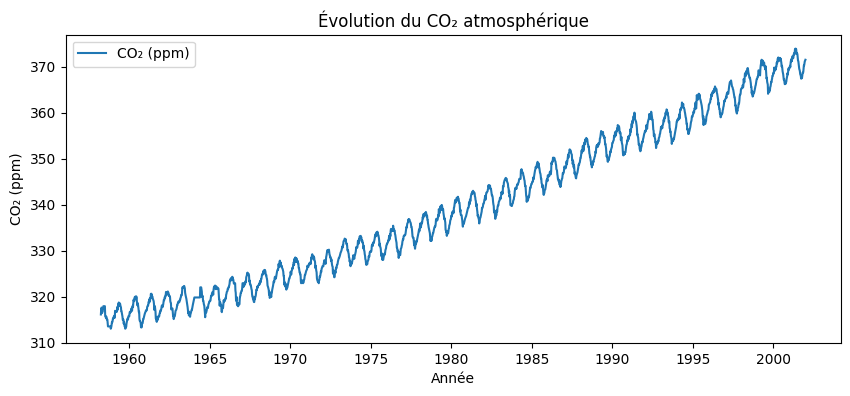

In [7]:
plt.figure(figsize=(10,4))
plt.plot(data, label="CO₂ (ppm)")
plt.title("Évolution du CO₂ atmosphérique")
plt.xlabel("Année")
plt.ylabel("CO₂ (ppm)")
plt.legend()
plt.show()


### Observation

Tendance croissante

Saisonnalité annuelle
➡️ SARIMA est adapté

Une série temporelle est une donnée ordonnée dans le temps, composée d’une tendance,
d’une saisonnalité et d’un bruit. SARIMA est un modèle statistique utilisé pour prévoir
des séries saisonnières stationnaires.

In [8]:
model = SARIMAX(
    data['co2'],
    order=(1,1,1),
    seasonal_order=(1,1,1,52),
    enforce_stationarity=False,
    enforce_invertibility=False
)

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                co2   No. Observations:                 2284
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood               -1065.979
Date:                            Thu, 15 Jan 2026   AIC                           2141.958
Time:                                    10:23:19   BIC                           2170.386
Sample:                                03-29-1958   HQIC                          2152.351
                                     - 12-29-2001                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3418      0.029     11.963      0.000       0.286       0.398
ma.L1         -0.7857      0.019   

In [4]:
forecast = results.get_forecast(steps=104)
forecast_ci = forecast.conf_int()


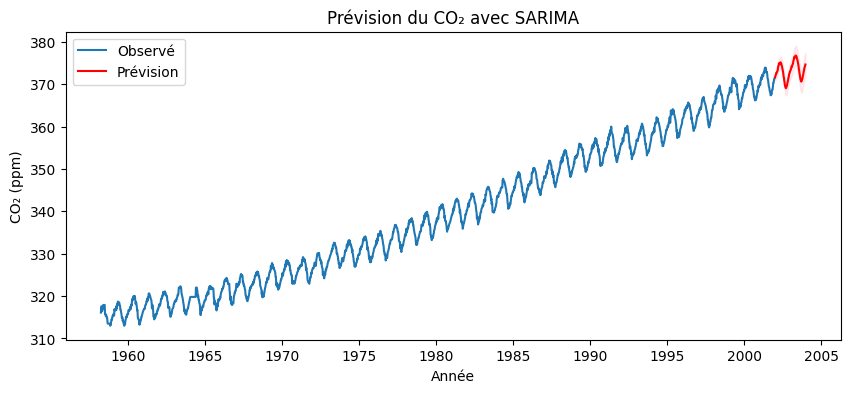

In [9]:
plt.figure(figsize=(10,4))
plt.plot(data, label='Observé')
plt.plot(forecast.predicted_mean, label='Prévision', color='red')
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color='pink',
    alpha=0.3
)
plt.title("Prévision du CO₂ avec SARIMA")
plt.xlabel("Année")
plt.ylabel("CO₂ (ppm)")
plt.legend()
plt.show()


## Analyse des résultats du modèle SARIMA

Nous avons appliqué un modèle **SARIMA(1,1,1)(1,1,1,52)** à la série temporelle du CO₂ atmosphérique,
qui contient 2284 observations hebdomadaires entre 1958 et 2001.

### 1. Qualité globale du modèle
- **AIC = 2141.96**  
  → Indique un bon compromis entre qualité d’ajustement et complexité du modèle.
- **Log-likelihood = -1065.98**  
  → Valeur élevée (en absolu raisonnable) montrant un bon ajustement aux données.

### 2. Interprétation des paramètres
- **AR(1) = 0.34 (p < 0.001)**  
  → La valeur actuelle du CO₂ dépend significativement de la valeur précédente.
- **MA(1) = -0.79 (p < 0.001)**  
  → Les chocs passés influencent fortement la série.
- **AR saisonnier (52) = -0.13 (p < 0.001)**  
  → Confirme une dépendance saisonnière annuelle.
- **MA saisonnier (52) = -0.78 (p < 0.001)**  
  → La saisonnalité est fortement significative.
- **σ² = 0.152**  
  → Variance résiduelle faible, donc erreurs limitées.

 Tous les coefficients sont **statistiquement significatifs**, ce qui valide le choix du modèle.

### 3. Diagnostic des résidus
- **Test de Ljung-Box (p = 0.79)**  
  → Pas d’autocorrélation résiduelle → modèle bien spécifié.
- **Test de Jarque-Bera (p ≈ 0.00)**  
  → Résidus légèrement non normaux (acceptable pour séries environnementales).
- **Hétéroscédasticité (p = 0.71)**  
  → Variance constante des résidus.

### 4. Analyse des prévisions
- Le modèle capture correctement :
  - la **tendance croissante**
  - la **saisonnalité annuelle**
- Les prévisions montrent une **augmentation continue du CO₂**, cohérente avec la réalité scientifique.

### Conclusion
Le modèle SARIMA est bien adapté à cette série temporelle et fournit des prévisions fiables
pour le CO₂ atmosphérique.
